In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
# Load the dataset
file_path = "../harga_bapokting_surabaya.csv"
df = pd.read_csv(file_path)

In [30]:
df.head()

,Tanggal,Beras Premium,Beras Medium,Beras SPHP,Jagung Tk Peternak,Kedelai Biji Kering (Impor),Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Merah Besar,...,Minyak Goreng Curah,Tepung Terigu (Curah),Minyakita,Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Daging Kerbau Beku (Impor),Daging Kerbau Segar (Lokal)
0,2024-01-01,14000,11950,0,6000,15000,28500,36000,41000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
1,2024-01-02,14000,11950,0,6000,15000,28500,36500,55000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
2,2024-01-03,14000,11950,0,6000,15000,31000,37000,51000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
3,2024-01-04,14000,12450,0,6000,13935,28870,37495,47920,0,...,15245,10000,0,11000,35000,35000,33890,10000,0,0
4,2024-01-05,14000,11950,0,6000,15000,31500,37000,43500,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tanggal                      485 non-null    object
 1   Beras Premium                485 non-null    int64 
 2   Beras Medium                 485 non-null    int64 
 3   Beras SPHP                   485 non-null    int64 
 4   Jagung Tk Peternak           485 non-null    int64 
 5   Kedelai Biji Kering (Impor)  485 non-null    int64 
 6   Bawang Merah                 485 non-null    int64 
 7   Bawang Putih Bonggol         485 non-null    int64 
 8   Cabai Merah Keriting         485 non-null    int64 
 9   Cabai Merah Besar            485 non-null    int64 
 10  Daging Sapi Murni            485 non-null    int64 
 11  Cabai Rawit Merah            485 non-null    int64 
 12  Daging Ayam Ras              485 non-null    int64 
 13  Telur Ayam Ras               485 no

In [32]:
df.shape

(485, 26)

In [33]:
df.isnull().sum()

Tanggal                        0
Beras Premium                  0
Beras Medium                   0
Beras SPHP                     0
Jagung Tk Peternak             0
Kedelai Biji Kering (Impor)    0
Bawang Merah                   0
Bawang Putih Bonggol           0
Cabai Merah Keriting           0
Cabai Merah Besar              0
Daging Sapi Murni              0
Cabai Rawit Merah              0
Daging Ayam Ras                0
Telur Ayam Ras                 0
Gula Konsumsi                  0
Minyak Goreng Kemasan          0
Minyak Goreng Curah            0
Tepung Terigu (Curah)          0
Minyakita                      0
Tepung Terigu Kemasan          0
Ikan Kembung                   0
Ikan Tongkol                   0
Ikan Bandeng                   0
Garam Konsumsi                 0
Daging Kerbau Beku (Impor)     0
Daging Kerbau Segar (Lokal)    0
dtype: int64

In [34]:
((df == 0) | (df.isnull())).sum()

Tanggal                          0
Beras Premium                   19
Beras Medium                    19
Beras SPHP                     248
Jagung Tk Peternak             363
Kedelai Biji Kering (Impor)    363
Bawang Merah                    19
Bawang Putih Bonggol            19
Cabai Merah Keriting            19
Cabai Merah Besar              373
Daging Sapi Murni               19
Cabai Rawit Merah               19
Daging Ayam Ras                 19
Telur Ayam Ras                  19
Gula Konsumsi                   19
Minyak Goreng Kemasan           19
Minyak Goreng Curah             19
Tepung Terigu (Curah)           19
Minyakita                      373
Tepung Terigu Kemasan           19
Ikan Kembung                    37
Ikan Tongkol                    37
Ikan Bandeng                    19
Garam Konsumsi                  19
Daging Kerbau Beku (Impor)     485
Daging Kerbau Segar (Lokal)    485
dtype: int64

In [35]:
# Hitung persentase nilai 0 untuk setiap kolom
zero_percentage = (df == 0).sum() / len(df)

# Tampilkan persentase nilai 0
print("Persentase nilai 0 per kolom:")
print(zero_percentage)

# Tentukan threshold, misalnya 30%
threshold = 0.3

# Dapatkan nama kolom yang lebih dari threshold
cols_to_drop = zero_percentage[zero_percentage > threshold].index

# Drop kolom-kolom tersebut
bapok_data = df.drop(columns=cols_to_drop)

# Tampilkan hasil
print(f"\nKolom yang dihapus (>{int(threshold * 100)}% nilai 0):")
print(list(cols_to_drop))


Persentase nilai 0 per kolom:
Tanggal                        0.000000
Beras Premium                  0.039175
Beras Medium                   0.039175
Beras SPHP                     0.511340
Jagung Tk Peternak             0.748454
Kedelai Biji Kering (Impor)    0.748454
Bawang Merah                   0.039175
Bawang Putih Bonggol           0.039175
Cabai Merah Keriting           0.039175
Cabai Merah Besar              0.769072
Daging Sapi Murni              0.039175
Cabai Rawit Merah              0.039175
Daging Ayam Ras                0.039175
Telur Ayam Ras                 0.039175
Gula Konsumsi                  0.039175
Minyak Goreng Kemasan          0.039175
Minyak Goreng Curah            0.039175
Tepung Terigu (Curah)          0.039175
Minyakita                      0.769072
Tepung Terigu Kemasan          0.039175
Ikan Kembung                   0.076289
Ikan Tongkol                   0.076289
Ikan Bandeng                   0.039175
Garam Konsumsi                 0.039175
Daging Ker

In [36]:
# Mengecek jumlah nilai 0 atau NaN per kolom
((bapok_data == 0) | (bapok_data.isnull())).sum()

Tanggal                   0
Beras Premium            19
Beras Medium             19
Bawang Merah             19
Bawang Putih Bonggol     19
Cabai Merah Keriting     19
Daging Sapi Murni        19
Cabai Rawit Merah        19
Daging Ayam Ras          19
Telur Ayam Ras           19
Gula Konsumsi            19
Minyak Goreng Kemasan    19
Minyak Goreng Curah      19
Tepung Terigu (Curah)    19
Tepung Terigu Kemasan    19
Ikan Kembung             37
Ikan Tongkol             37
Ikan Bandeng             19
Garam Konsumsi           19
dtype: int64

In [ ]:
import pandas as pd

# Salin data bersih untuk diproses
df = bapok_data.copy()

# Pastikan kolom Tanggal dalam format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Tambahkan kolom bantu: bulan dan tahun
df['Bulan'] = df['Tanggal'].dt.month
df['Tahun'] = df['Tanggal'].dt.year

# Loop setiap kolom (kecuali kolom waktu)
for col in df.columns:
    if col in ['Tanggal', 'Bulan', 'Tahun']:
        continue

# Temukan indeks baris yang nilainya 0
zero_rows = df[df[col] == 0]

for idx in zero_rows.index:
    tahun = df.loc[idx, 'Tahun']
    bulan = df.loc[idx, 'Bulan']
    
    # Hitung rata-rata bulan itu (kecuali 0)
    monthly_avg = df[(df['Tahun'] == tahun) & (df['Bulan'] == bulan) & (df[col] != 0)][col].mean()
    
    # Ganti nilai 0 dengan rata-rata jika ada
    if not np.isnan(monthly_avg):
        df.at[idx, col] = monthly_avg

# Hapus kolom bantu
df.drop(columns=['Bulan', 'Tahun'], inplace=True)

# Simpan hasil akhir ke variabel final
bapok_data = df


IndentationError: expected an indented block after 'for' statement on line 14 (850904160.py, line 15)

In [ ]:
((bapok_data == 0) | (bapok_data.isnull())).sum()

Tanggal                  0
Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Daging Sapi Murni        0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
Minyak Goreng Curah      0
Tepung Terigu (Curah)    0
Tepung Terigu Kemasan    0
Ikan Kembung             0
Ikan Tongkol             0
Ikan Bandeng             0
Garam Konsumsi           0
dtype: int64

In [ ]:
bapok_data.to_csv("anomali_data.csv", index=False)
bapok_data.head(0).to_csv("template_anomali.csv", index=False)

In [ ]:
# Step 1: Preprocessing - convert date and normalize the features

from sklearn.preprocessing import StandardScaler

# Convert 'Tanggal' to datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Save the original dates for future reference
dates = df['Tanggal']

# Drop the 'Tanggal' column for modeling
data_prices = df.drop(columns='Tanggal')

# Normalize the price data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_prices)

# Prepare the normalized data in a DataFrame for easier inspection
normalized_df = pd.DataFrame(normalized_data, columns=data_prices.columns)
normalized_df['Tanggal'] = dates

normalized_df.head()


,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan,Minyak Goreng Curah,Tepung Terigu (Curah),Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Tanggal
0,-2.410036,-1.139031,-0.274185,-0.985082,0.348204,-2.502765,1.420146,-1.416644,-0.613273,-0.431827,-0.808231,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-01
1,-2.410036,-1.139031,-0.274185,-0.809526,1.429661,-2.502765,1.216432,-1.416644,-0.613273,-0.431827,-0.808231,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-02
2,-2.410036,-1.139031,0.015723,-0.633971,1.120673,-2.502765,0.834467,-1.081244,-0.613273,-0.431827,-0.808231,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-03
3,-2.410036,-0.271918,-0.231279,-0.460171,0.882753,-2.502765,0.481533,-1.248944,-0.954780,-0.083485,-0.808231,-1.638996,-0.420668,-3.670405,2.176286,2.000024,0.114856,-0.032891,2024-01-04
4,-2.410036,-1.139031,0.073704,-0.633971,0.541321,-2.502765,0.019611,-1.081244,-1.282895,-0.431827,-0.808231,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-05


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Step 2: Train Isolation Forest model
isoforest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
isoforest.fit(normalized_data)

# Predict anomaly scores
anomaly_scores = isoforest.decision_function(normalized_data)
anomalies = isoforest.predict(normalized_data)  # -1 = anomaly, 1 = normal

# Tambahkan hasil ke dataframe
normalized_df['anomaly_score'] = anomaly_scores
normalized_df['anomaly'] = anomalies
normalized_df['anomaly'] = normalized_df['anomaly'].map({1: 0, -1: 1})  # ubah ke 0=normal, 1=anomali

# Tampilkan 10 data anomali teratas
anomalies_df = normalized_df[normalized_df['anomaly'] == 1]
anomalies_df.head(10)


,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,...,Minyak Goreng Curah,Tepung Terigu (Curah),Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Tanggal,anomaly_score,anomaly
0,-2.410036,-1.139031,-0.274185,-0.985082,0.348204,-2.502765,1.420146,-1.416644,-0.613273,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-01,-0.018784,1
1,-2.410036,-1.139031,-0.274185,-0.809526,1.429661,-2.502765,1.216432,-1.416644,-0.613273,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-02,-0.009824,1
2,-2.410036,-1.139031,0.015723,-0.633971,1.120673,-2.502765,0.834467,-1.081244,-0.613273,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-03,-0.006216,1
3,-2.410036,-0.271918,-0.231279,-0.460171,0.882753,-2.502765,0.481533,-1.248944,-0.954780,-0.083485,...,-1.638996,-0.420668,-3.670405,2.176286,2.000024,0.114856,-0.032891,2024-01-04,-0.038918,1
4,-2.410036,-1.139031,0.073704,-0.633971,0.541321,-2.502765,0.019611,-1.081244,-1.282895,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-05,-0.010893,1
8,-2.410036,-1.139031,-0.100240,-0.809526,1.236544,-2.502765,0.146932,-1.416644,-1.282895,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-09,-0.000292,1
9,-2.410036,-1.139031,-0.216203,-1.160637,1.429661,-2.502765,0.019611,-1.416644,-1.282895,-0.431827,...,-1.456681,-0.420668,0.479633,2.176286,2.000024,1.504186,-0.032891,2024-01-10,-0.004518,1
36,-2.410036,-2.959967,-1.027945,-2.389524,1.043426,-2.502765,-0.616996,-1.416644,0.056349,-1.128509,...,-1.099199,-0.420668,1.862979,0.836467,-0.839209,0.845735,-0.032891,2024-02-06,-0.000569,1
44,1.739200,4.150356,-1.027945,-0.985082,1.429661,-0.334772,0.656217,-0.745843,-0.613273,-1.128509,...,-1.814162,-0.420668,-0.903713,0.836467,0.070448,-3.763417,-0.032891,2024-02-14,-0.009891,1
104,0.356122,-2.959967,2.798836,1.297138,0.193710,1.833222,-0.744318,2.608161,1.395594,0.264856,...,-1.099199,-0.420668,1.862979,0.836467,0.070448,0.845735,-0.032891,2024-04-14,-0.030284,1


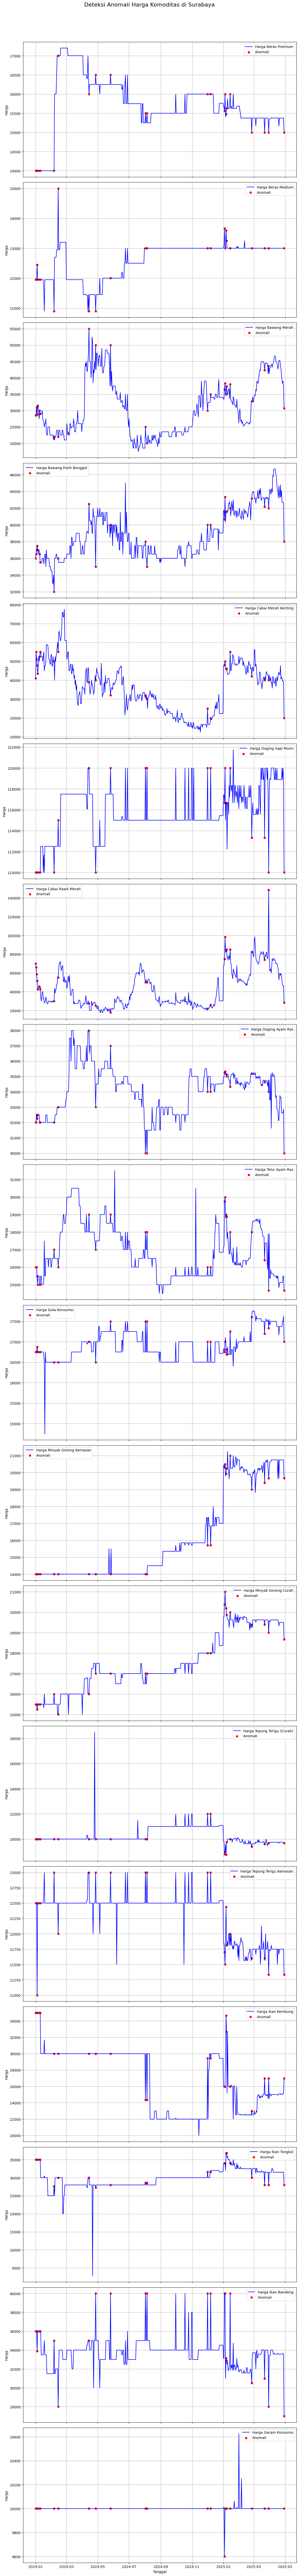

In [ ]:
df['anomaly'] = [1 if x == -1 else 0 for x in anomalies]
komoditas_pilihan = ["Beras Premium", "Beras Medium", "Bawang Merah", "Bawang Putih Bonggol", 
                          "Cabai Merah Keriting", "Daging Sapi Murni", "Cabai Rawit Merah", "Daging Ayam Ras", 
                          "Telur Ayam Ras", "Gula Konsumsi", "Minyak Goreng Kemasan", "Minyak Goreng Curah", 
                          "Tepung Terigu (Curah)", "Tepung Terigu Kemasan", "Ikan Kembung", "Ikan Tongkol", 
                          "Ikan Bandeng", "Garam Konsumsi"]  # bisa 1 atau lebih

# Subplots
fig, axs = plt.subplots(len(komoditas_pilihan), 1, figsize=(12, 6 * len(komoditas_pilihan)), sharex=True)
fig.suptitle('Deteksi Anomali Harga Komoditas di Surabaya', fontsize=16)

# Jika hanya satu subplot, ubah axs menjadi list agar bisa diakses dengan indeks
if len(komoditas_pilihan) == 1:
    axs = [axs]

for i, komoditas in enumerate(komoditas_pilihan):
    ax = axs[i]
    ax.plot(df['Tanggal'], df[komoditas], label=f'Harga {komoditas}', color='blue')

    # Tandai anomali
    anomali_data = df[df['anomaly'] == 1]
    ax.scatter(anomali_data['Tanggal'], anomali_data[komoditas], color='red', label='Anomali', s=30)

    ax.set_ylabel('Harga')
    ax.legend()
    ax.grid(True)

plt.xlabel('Tanggal')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [ ]:
import pandas as pd

# Pastikan kolom Tanggal dalam datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Bulan'] = df['Tanggal'].dt.to_period('M')

# Ambil data anomali
anomali_detail = df[df['anomaly'] == 1][['Tanggal', 'Bulan'] + komoditas_pilihan].copy()

# Hitung statistik bulanan dan gabungkan
for komoditas in komoditas_pilihan:
    stats_bulanan = df.groupby('Bulan')[komoditas].agg([
        ('Min_' + komoditas, 'min'),
        ('Max_' + komoditas, 'max'),
        ('Median_' + komoditas, 'median'),
        ('Mean_' + komoditas, 'mean')
    ])

    # Gabung statistik ke anomali_detail
    anomali_detail = anomali_detail.merge(stats_bulanan, on='Bulan', how='left')

# Hapus kolom 'Bulan'
anomali_detail.drop(columns='Bulan', inplace=True)

# Kosongkan statistik bulanan selain baris pertama per bulan (agar tidak berulang)
for komoditas in komoditas_pilihan:
    mask = anomali_detail['Tanggal'].dt.to_period('M').duplicated()
    for stat in ['Min', 'Max', 'Median', 'Mean']:
        col = f'{stat}_{komoditas}'
        anomali_detail.loc[mask, col] = ""

# Tampilkan hasil
display(anomali_detail)


C:\Users\Rifal\AppData\Local\Temp\ipykernel_26044\3472180746.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  anomali_detail.loc[mask, col] = ""
C:\Users\Rifal\AppData\Local\Temp\ipykernel_26044\3472180746.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  anomali_detail.loc[mask, col] = ""
C:\Users\Rifal\AppData\Local\Temp\ipykernel_26044\3472180746.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  anomali_detail.loc[mask, col] = ""
C:\Users\Rifal\AppData\Lo

,Tanggal,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Daging Sapi Murni,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,...,Median_Ikan Tongkol,Mean_Ikan Tongkol,Min_Ikan Bandeng,Max_Ikan Bandeng,Median_Ikan Bandeng,Mean_Ikan Bandeng,Min_Garam Konsumsi,Max_Garam Konsumsi,Median_Garam Konsumsi,Mean_Garam Konsumsi
0,2024-01-01,14000.0,11950.0,28500.0,36000.0,41000.0,110000.0,70000.0,32000.0,26000.0,...,30000.0,30500.0,31500.0,36000.0,33500.0,33802.903226,10000.0,10000.0,10000.0,10000.0
1,2024-01-02,14000.0,11950.0,28500.0,36500.0,55000.0,110000.0,66000.0,32000.0,26000.0,...,,,,,,,,,,
2,2024-01-03,14000.0,11950.0,31000.0,37000.0,51000.0,110000.0,58500.0,32500.0,26000.0,...,,,,,,,,,,
3,2024-01-04,14000.0,12450.0,28870.0,37495.0,47920.0,110000.0,51570.0,32250.0,25490.0,...,,,,,,,,,,
4,2024-01-05,14000.0,11950.0,31500.0,37000.0,43500.0,110000.0,42500.0,32500.0,25000.0,...,,,,,,,,,,
5,2024-01-09,14000.0,11950.0,30000.0,36500.0,52500.0,110000.0,45000.0,32000.0,25000.0,...,,,,,,,,,,
6,2024-01-10,14000.0,11950.0,29000.0,35500.0,55000.0,110000.0,42500.0,32000.0,25000.0,...,,,,,,,,,,
7,2024-02-06,14000.0,10900.0,22000.0,32000.0,50000.0,110000.0,30000.0,32000.0,27000.0,...,30000.0,27642.857143,28000.0,35000.0,33000.0,32568.965517,10000.0,10000.0,10000.0,10000.0
8,2024-02-14,17000.0,15000.0,22000.0,36000.0,55000.0,115000.0,55000.0,33000.0,26000.0,...,,,,,,,,,,
9,2024-04-14,16000.0,10900.0,55000.0,42500.0,39000.0,120000.0,27500.0,38000.0,29000.0,...,28000.0,27288.888889,30000.0,40000.0,34535.714286,34535.714286,10000.0,10000.0,10000.0,10000.0


In [ ]:
import joblib

# Step 3: Simpan model dan scaler
model_path = "anomali_model.pkl"
scaler_path = "anomali_scaler.pkl"

# Save the Isolation Forest model
joblib.dump(isoforest, model_path)

# Save the scaler
joblib.dump(scaler, scaler_path)

model_path, scaler_path

('anomali_model.pkl', 'anomali_scaler.pkl')